In [9]:
pip install numpy

    100% |████████████████████████████████| 15.1MB 777kB/s ta 0:00:01    31% |██████████                      | 4.8MB 701kB/s eta 0:00:15    39% |████████████▌                   | 5.9MB 640kB/s eta 0:00:15
You are using pip version 19.0.3, however version 20.1b1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install pandas

    100% |████████████████████████████████| 10.0MB 2.1MB/s ta 0:00:01   32% |██████████▍                     | 3.2MB 810kB/s eta 0:00:09
    100% |████████████████████████████████| 512kB 1.7MB/s ta 0:00:01
You are using pip version 19.0.3, however version 20.1b1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install tqdm

    100% |████████████████████████████████| 61kB 94kB/s ta 0:00:011
You are using pip version 19.0.3, however version 20.1b1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install matplotlib

    100% |████████████████████████████████| 12.5MB 1.3MB/s ta 0:00:011
    100% |████████████████████████████████| 71kB 9.7MB/s eta 0:00:01
    100% |████████████████████████████████| 61kB 10.0MB/s ta 0:00:01
You are using pip version 19.0.3, however version 20.1b1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install seaborn

    100% |████████████████████████████████| 225kB 2.5MB/s ta 0:00:01
    100% |████████████████████████████████| 28.4MB 1.2MB/s ta 0:00:011  1% |▌                               | 481kB 1.8MB/s eta 0:00:16    8% |██▉                             | 2.5MB 4.4MB/s eta 0:00:06    46% |██████████████▉                 | 13.1MB 2.3MB/s eta 0:00:07
You are using pip version 19.0.3, however version 20.1b1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install tensorflow

    100% |████████████████████████████████| 120.8MB 349kB/s ta 0:00:011   33% |██████████▊                     | 40.6MB 6.5MB/s eta 0:00:13    34% |███████████                     | 41.4MB 2.4MB/s eta 0:00:34    54% |█████████████████▍              | 65.7MB 7.9MB/s eta 0:00:08    67% |█████████████████████▊          | 81.9MB 6.3MB/s eta 0:00:07
    100% |████████████████████████████████| 51kB 10.3MB/s ta 0:00:01
    100% |████████████████████████████████| 61kB 9.5MB/s eta 0:00:01
    100% |████████████████████████████████| 1.3MB 3.7MB/s ta 0:00:011
    100% |████████████████████████████████| 51kB 3.6MB/s ta 0:00:01
    100% |████████████████████████████████| 71kB 4.4MB/s ta 0:00:011
    100% |████████████████████████████████| 2.6MB 2.6MB/s ta 0:00:011
    100% |████████████████████████████████| 112kB 7.3MB/s ta 0:00:01
    100% |████████████████████████████████| 450kB 5.0MB/s ta 0:00:011
    100% |████████████████████████████████| 3.9MB 3.0MB/s eta 0:00:01
    100% |███████████████████

    100% |████████████████████████████████| 163kB 7.4MB/s ta 0:00:011
    100% |████████████████████████████████| 81kB 6.8MB/s ta 0:00:011
    100% |████████████████████████████████| 153kB 7.5MB/s ta 0:00:01
tensorboard 2.1.1 has requirement setuptools>=41.0.0, but you'll have setuptools 40.8.0 which is incompatible.
  Running setup.py install for gast ... done
  Running setup.py install for absl-py ... done
  Running setup.py install for wrapt ... done
  Running setup.py install for termcolor ... done
You are using pip version 19.0.3, however version 20.1b1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install random

  Could not find a version that satisfies the requirement random (from versions: )
No matching distribution found for random
You are using pip version 19.0.3, however version 20.1b1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
from os.path import join
import numpy as np
from tqdm.notebook import tqdm
import multiprocessing

import numpy as np
import pandas as pd

# Path
ROOT_DIR_PATH = '/home/ydj/data'
TRAIN_DIR_PATH = join(ROOT_DIR_PATH, 'train')
TEST_DIR_PATH = join(ROOT_DIR_PATH, 'test')
TRAIN_FEATHER_PATH = join(ROOT_DIR_PATH, 'train.ftr')
TEST_FEATHER_PATH = join(ROOT_DIR_PATH, 'test.ftr')

# Column(feature) names
INPUT_COL = [f"temp{i}" for i in range(1, 10)] + ['type', 'long_GMI', 'lat_GMI', 'long_DPR', 'lat_DPR']
TARGET_COL = ['precipitation']
TEST_COL = INPUT_COL
TRAIN_COL = INPUT_COL + TARGET_COL

# Name column (optional)
IS_PAD_NAME_COL = False
NAME_COL = ['orbit', 'subset', 'pixel']
PIXEL_COL = np.arange(1, 1601)[:, None]


def pad_name_cols(nd, file_name):
    orbit, subset = file_name.split('_')[1:]
    subset = subset[:2]
    nd = np.pad(nd, ((0, 0), (0, 1)), constant_values=int(orbit))
    nd = np.pad(nd, ((0, 0), (0, 1)), constant_values=int(subset))
    return np.c_[nd, PIXEL_COL]

def generate_ndarray_from_file_name(file_name, dir_path):
    file_path = join(dir_path, file_name)
    nd = np.load(file_path).astype(np.float32)  # 40 x 40 x ?
    dim = nd.shape[-1]
    nd = nd.reshape(-1, dim)                    # 1600    x ?
    if IS_PAD_NAME_COL:
        nd = pad_name_col(nd, file_name)
    return nd
    
def generate_ndarray_from_dir_path(dir_path):
    pool = multiprocessing.Pool()
    nds = pool.starmap(generate_ndarray_from_file_name, [(file_name, dir_path) for file_name in tqdm(os.listdir(dir_path))])
    return np.concatenate(nds)


def generate_dataframe_from_dir_path(dir_path):
    nd = generate_ndarray_from_dir_path(dir_path)
    dim = nd.shape[-1]
    df =  pd.DataFrame(nd,
                       columns=TRAIN_COL if dim == len(TRAIN_COL) else TEST_COL,
                       dtype=np.float32
                      )
    if IS_PAD_NAME_COL:
        df[['orbit', 'subset', 'pixel']] = df[['orbit', 'subset', 'pixel']].astype(np.int32)
        df.sort_values(by=['orbit', 'subset', 'pixel'], ignore_index=True, inplace=True)
    return df


def main():
    global TRAIN_COL, TEST_COL
    TRAIN_COL, TEST_COL = (TRAIN_COL, TEST_COL) if not IS_PAD_NAME_COL else (TRAIN_COL + NAME_COL, TEST_COL + NAME_COL)
    for dir_path in (TRAIN_DIR_PATH, TEST_DIR_PATH):
        df = generate_dataframe_from_dir_path(dir_path)
        if len(df.columns) == len(TRAIN_COL):
            train_df = df
        else:
            test_df = df
    return train_df, test_df

def to_feather(train_df, test_df):
    train_df.to_feather(TRAIN_FEATHER_PATH)
    test_df.to_feather(TEST_FEATHER_PATH)

def read_feather():
    train_df = pd.read_feather(TRAIN_FEATHER_PATH)
    test_df = pd.read_feather(TEST_FEATHER_PATH)
    return train_df, test_df

ModuleNotFoundError: No module named 'tqdm'

In [14]:
import os
import glob
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import random
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Conv2DTranspose, MaxPooling2D, BatchNormalization, Activation, concatenate, Input, GlobalAveragePooling2D
from tensorflow.keras import Model
import warnings
 
warnings.filterwarnings("ignore")

In [15]:
np.random.seed(7)
random.seed(7)
tf.random.set_seed(7)

In [31]:
def trainGenerator():
    
    train_path = 'train'
    train_files = sorted(glob.glob(train_path + '/*'))
    
    for file in train_files:
        
        dataset = np.load(file)
        
        target= dataset[:,:,-1].reshape(40,40,1)
        cutoff_labels = np.where(target < 0, 0, target)
        feature = dataset[:,:,:9]
        
        if (cutoff_labels > 0).sum() < 50:
            
            continue

        yield (feature, cutoff_labels)
        
train_dataset = tf.data.Dataset.from_generator(trainGenerator, (tf.float32, tf.float32), (tf.TensorShape([40,40,9]),tf.TensorShape([40,40,1])))

In [33]:
print(train_dataset)

<FlatMapDataset shapes: ((40, 40, 9), (40, 40, 1)), types: (tf.float32, tf.float32)>


In [18]:
train_dataset = train_dataset.batch(512).prefetch(1)

In [19]:
test_path = 'test'
test_files = sorted(glob.glob(test_path + '/*'))

X_test = []

for file in tqdm(test_files, desc = 'test'):
    
    data = np.load(file)
    
    X_test.append(data[:,:,:9])
                  
X_test = np.array(X_test)

test: 0it [00:00, ?it/s]


In [21]:
color_map = plt.cm.get_cmap('RdBu')
color_map = color_map.reversed()

In [38]:
image_sample = np.load('⁨Desktop/train/subset_010462_02.npy')

FileNotFoundError: [Errno 2] No such file or directory: '\u2068Desktop/train/subset_010462_02.npy'

NameError: name 'image_sample' is not defined

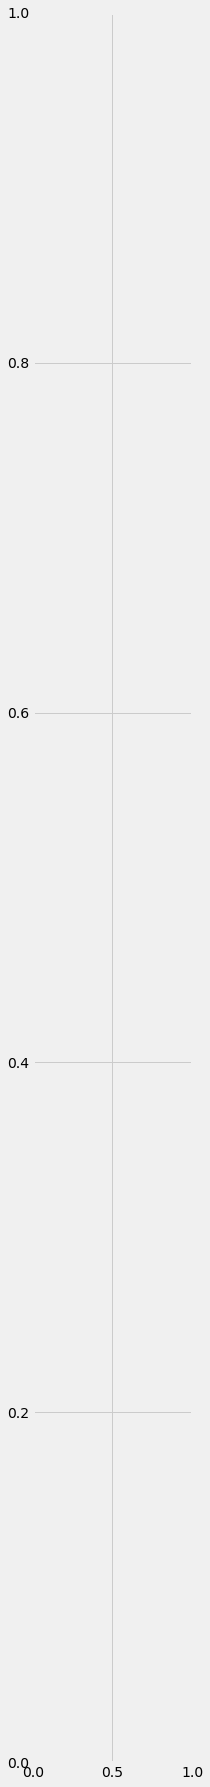

In [39]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(30, 30))

for i in range(9):
    plt.subplot(1,10,i+1)
    plt.imshow(image_sample[:, :, i], cmap=color_map)

plt.subplot(1,10,10)
plt.imshow(image_sample[:,:,-1], cmap = color_map)
plt.show()